In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
#Get multiple outputs in same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)

In [4]:
data = pd.read_csv("C:\\Users\\saket\\Downloads\\jupyter notebook\\edyoda data\\wine_red.csv",sep=';')




In [5]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
data.shape

(1599, 12)

In [7]:
data.info()
#no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

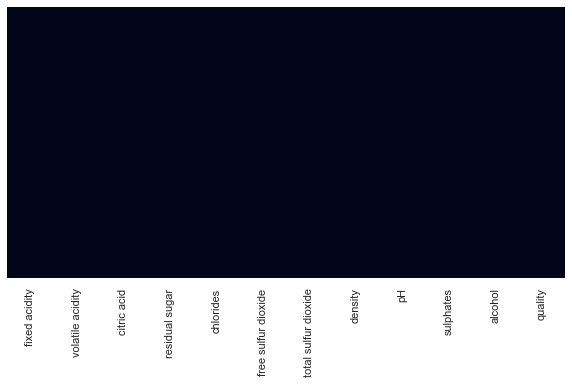

In [9]:
fig = plt.figure(figsize=(10,5))


sns.heatmap(data.isnull(),yticklabels=False,cbar=False,)

* Can we minimize/bucketize the target information?
* Let's try to bucketize it to 3 classes

In [10]:
def f(r):
    if r <= 3:
        return 1
    elif r<= 6:
        return 2
    else:
        return 3

data.quality = data.quality.map(f)

In [11]:
data.sample(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
513,10.5,0.510,0.64,2.40,0.107,6.0,15.0,0.99730,3.09,0.66,11.8,3
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,3
42,7.5,0.490,0.20,2.60,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,2
1026,7.9,0.310,0.32,1.90,0.066,14.0,36.0,0.99364,3.41,0.56,12.6,2
132,5.6,0.500,0.09,2.30,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,2
792,7.1,0.610,0.02,2.50,0.081,17.0,87.0,0.99745,3.48,0.60,9.7,2
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,2
768,7.1,0.590,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,2
70,7.7,0.630,0.08,1.90,0.076,15.0,27.0,0.99670,3.32,0.54,9.5,2
560,12.7,0.600,0.49,2.80,0.075,5.0,19.0,0.99940,3.14,0.57,11.4,2


In [12]:
x = data.quality.value_counts()

<AxesSubplot:>

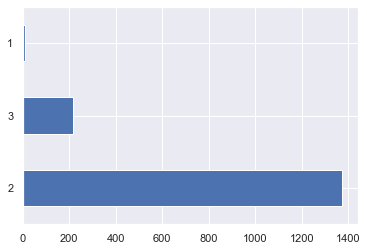

In [13]:
x.plot.barh()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression()

In [17]:
trainX, testX, trainY, testY = train_test_split(data.drop(columns=['quality']), data.quality)

In [18]:
lr.fit(trainX, trainY)

LogisticRegression()

In [19]:
lr.score(testX, testY)

0.8575

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt = DecisionTreeClassifier()

In [22]:
dt.fit(trainX, trainY)

DecisionTreeClassifier()

In [23]:
dt.score(testX, testY)

0.8725

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
ad = AdaBoostClassifier(n_estimators=7)

In [26]:
ad.fit(trainX,trainY)

AdaBoostClassifier(n_estimators=7)

In [27]:
ad.score(trainX,trainY)

0.8715596330275229

In [28]:
from sklearn.feature_selection import f_classif, SelectKBest
fs = SelectKBest(k=7,score_func=f_classif)

In [29]:
feature = data.drop(columns=['quality'])
target = data.quality

In [30]:
feature_fs = fs.fit_transform(feature, target)

In [31]:
trainX, testX, trainY, testY = train_test_split(feature_fs, target)

In [32]:
lr = LogisticRegression()
lr.fit(trainX, trainY)

LogisticRegression()

In [33]:
lr.score(testX, testY)

0.85

In [34]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [35]:
sampler = RandomOverSampler()

In [36]:
feature_s, target_s = sampler.fit_sample(feature_fs, target)

In [37]:
feature_s.shape

(4116, 7)

In [38]:
pd.Series(target_s).value_counts()

3    1372
2    1372
1    1372
Name: quality, dtype: int64

In [39]:
lr = LogisticRegression()

In [40]:
trainX, testX, trainY, testY = train_test_split(feature_s, target_s)

In [41]:
lr.fit(trainX, trainY)


LogisticRegression()

In [42]:
y_pred = lr.predict(testX)

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_pred=y_pred, y_true=testY)

array([[304,  40,   0],
       [ 57, 208,  77],
       [  9,  73, 261]], dtype=int64)

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt = DecisionTreeClassifier()

In [47]:
dt.fit(trainX, trainY)

DecisionTreeClassifier()

In [48]:
dt.score(testX, testY)

0.9747327502429544